## K-MEANS CLUSTERING

# Apa itu K Means

K-Means adalah salah satu algoritma unsupervised machine learning yang digunakan untuk mengelompokkan data ke dalam beberapa cluster berdasarkan kesamaan fitur. Intinya, algoritma ini bertujuan untuk membagi data menjadi k kelompok atau cluster yang masing-masing data dalam cluster memiliki kemiripan yang tinggi satu sama lain.

Bagaimana K-Means Bekerja?

- Menentukan jumlah cluster (k): Langkah pertama adalah memilih jumlah cluster yang diinginkan, yaitu k. Misalnya, kamu memilih k=3 untuk 3 cluster.

- Menentukan titik centroid awal: K-Means secara acak memilih k titik yang disebut centroid untuk mewakili setiap cluster. Titik-titik centroid ini adalah pusat awal dari cluster.

- Menetapkan data ke cluster: Setelah centroid ditentukan, setiap data akan dipetakan ke dalam cluster yang paling dekat dengan centroid-nya. Kedekatan ini diukur dengan jarak Euclidean, yaitu jarak linier antara data dan centroid.

- Menghitung ulang centroid: Setelah semua data dikelompokkan, centroid dihitung ulang berdasarkan rata-rata posisi data dalam cluster tersebut. Ini dilakukan dengan mencari titik pusat dari data yang ada dalam cluster.

- Mengulangi langkah 3 dan 4: Proses ini akan diulang secara iteratif. Setiap iterasi, data akan dipetakan ulang ke centroid yang baru, dan centroid dihitung ulang berdasarkan pembagian data terbaru.

- Konvergensi: Proses akan berhenti ketika centroid tidak berubah lagi (atau perubahan sangat kecil). Pada titik ini, cluster dianggap stabil dan selesai.

Contoh Visualisasi K-Means Clustering:

Misalkan kita memiliki dua fitur dalam dataset, seperti panjang dan lebar kelopak bunga (seperti pada dataset iris). Setelah menjalankan K-Means dengan k=2, kita akan mendapatkan dua cluster berdasarkan kedekatan antar data, dengan masing-masing cluster memiliki titik centroid yang mewakili posisi rata-rata data dalam cluster tersebut.

Visualisasi dari proses K-Means akan memperlihatkan titik-titik data yang digabungkan dalam cluster yang berbeda, dengan centroid (titik pusat) yang jelas di tengah-tengah setiap cluster.

Keunggulan K-Means:

- Cepat dan Efisien: K-Means bekerja dengan baik pada dataset besar dan dapat diimplementasikan dengan cepat.

- Fleksibel: Algoritma ini dapat diterapkan pada berbagai macam data numerik.

- Mudah Dimengerti: Konsepnya sederhana dan mudah dipahami, terutama dalam hal pembagian data ke dalam cluster berdasarkan kedekatannya.

Kekurangan K-Means:

- Memerlukan Penentuan Jumlah K: Salah satu kekurangan utama adalah kita perlu menentukan jumlah cluster k di awal, yang bisa jadi sulit tanpa pemahaman mendalam tentang data.

- Sensitif terhadap Inisialisasi Centroid: K-Means bisa terjebak dalam solusi suboptimal jika centroid awal dipilih secara acak. Untuk mengatasi hal ini, ada teknik seperti k-means++ yang dapat membantu pemilihan centroid awal yang lebih baik.

- Hanya untuk Data Numerik: K-Means mengandalkan jarak Euclidean, jadi lebih cocok untuk data numerik, bukan data kategorikal.

Evaluasi Hasil K-Means:

Beberapa metrik yang dapat digunakan untuk mengevaluasi hasil K-Means adalah:

- Silhouette Score: Metrik ini mengukur seberapa baik setiap data dipetakan ke dalam cluster yang benar, dengan nilai antara -1 hingga 1. Nilai yang lebih tinggi menunjukkan clustering yang lebih baik.

- Inertia (SSE - Sum of Squared Errors): Ini mengukur seberapa jauh data dalam cluster dari centroid-nya. Nilai inertia yang lebih rendah menunjukkan cluster yang lebih kompak.



## Code nya

1. Install beberapa library

In [3]:
!pip install pymysql
!pip install psycopg2-binary
!pip install pandas
!pip install SQLAlchemy pymysql
!pip install scikit-learn
!pip install numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 66.5 MB/s eta 0:00:00


2. Ambil Database dari dbever

In [4]:
import pymysql
import pandas as pd
from tabulate import tabulate

MYSQL_HOST = "mysql-ce646e0-matakuliah.i.aivencloud.com"
MYSQL_PORT = 18376  # Aiven MySQL biasanya menggunakan port 25060
MYSQL_DB = "defaultdb"  # Ganti dengan nama database Anda
MYSQL_USER = "avnadmin"  # Username dari Aiven.io
MYSQL_PASS = "AVNS_ttJDVCcji3xAatQ6zvd"  # Ganti dengan password dari Aiven.io

try:
    # Membuat koneksi ke MySQL
    conn = pymysql.connect(
        host=MYSQL_HOST,
        port=MYSQL_PORT,
        user=MYSQL_USER,
        password=MYSQL_PASS,
        database=MYSQL_DB,
        ssl={'ssl': {}},  # Aiven.io membutuhkan koneksi SSL
    )
    cur = conn.cursor()

    # Menjalankan query (Ganti 'your_table' dengan nama tabel yang benar)
    cur.execute("SELECT * FROM defaultdb.irissql;")
    rows = cur.fetchall()

    # Mengambil nama kolom
    col_names = [desc[0] for desc in cur.description]

    # Menampilkan hasil dalam bentuk tabel
    df = pd.DataFrame(rows, columns=col_names)
    print(tabulate(df, headers="keys", tablefmt="psql"))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi
    if cur:
        cur.close()
    if conn:
        conn.close()

+-----+------+-----------------+----------------+-----------------+----------------+-----------------+
|     |   id |   SepalLengthCm |   SepalWidthCm |   PetalLengthCm |   PetalWidthCm | species         |
|-----+------+-----------------+----------------+-----------------+----------------+-----------------|
|   0 |    1 |             5.1 |            3.5 |             1.4 |            0.2 | Iris-setosa     |
|   1 |    2 |             4.9 |            3   |             1.4 |            0.2 | Iris-setosa     |
|   2 |    3 |             4.7 |            3.2 |             1.3 |            0.2 | Iris-setosa     |
|   3 |    4 |             4.6 |            3.1 |             1.5 |            0.2 | Iris-setosa     |
|   4 |    5 |             5   |            3.6 |             1.4 |            0.2 | Iris-setosa     |
|   5 |    6 |             5.4 |            3.9 |             1.7 |            0.4 | Iris-setosa     |
|   6 |    7 |             4.6 |            3.4 |             1.4 |      

3. Hilangan species/labelnya

In [5]:
import pymysql
import pandas as pd
from tabulate import tabulate

MYSQL_HOST = "mysql-ce646e0-matakuliah.i.aivencloud.com"
MYSQL_PORT = 18376  # Aiven MySQL biasanya menggunakan port 25060
MYSQL_DB = "defaultdb"  # Ganti dengan nama database Anda
MYSQL_USER = "avnadmin"  # Username dari Aiven.io
MYSQL_PASS = "AVNS_ttJDVCcji3xAatQ6zvd"  # Ganti dengan password dari Aiven.io

try:
    # Membuat koneksi ke MySQL
    conn = pymysql.connect(
        host=MYSQL_HOST,
        port=MYSQL_PORT,
        user=MYSQL_USER,
        password=MYSQL_PASS,
        database=MYSQL_DB,
        ssl={'ssl': {}},  # Aiven.io membutuhkan koneksi SSL
    )
    cur = conn.cursor()

    # Menjalankan query untuk mengambil data tanpa kolom 'species'
    cur.execute("SELECT sepalLengthCm, sepalWidthCm, petalLengthCm, petalWidthCm FROM defaultdb.irissql;")
    rows = cur.fetchall()

    # Mengambil nama kolom
    col_names = [desc[0] for desc in cur.description]

    # Menampilkan hasil dalam bentuk tabel
    df = pd.DataFrame(rows, columns=col_names)
    data_remove_class = df.to_numpy()  # atau df.values

    # Menampilkan DataFrame tanpa kolom species (kalau ada)
    print("Data tanpa kolom 'species':")
    print(tabulate(df, headers="keys", tablefmt="psql"))

except Exception as e:
    print("Error:", e)

finally:
    # Menutup koneksi
    if cur:
        cur.close()
    if conn:
        conn.close()


Data tanpa kolom 'species':
+-----+-----------------+----------------+-----------------+----------------+
|     |   sepalLengthCm |   sepalWidthCm |   petalLengthCm |   petalWidthCm |
|-----+-----------------+----------------+-----------------+----------------|
|   0 |             5.1 |            3.5 |             1.4 |            0.2 |
|   1 |             4.9 |            3   |             1.4 |            0.2 |
|   2 |             4.7 |            3.2 |             1.3 |            0.2 |
|   3 |             4.6 |            3.1 |             1.5 |            0.2 |
|   4 |             5   |            3.6 |             1.4 |            0.2 |
|   5 |             5.4 |            3.9 |             1.7 |            0.4 |
|   6 |             4.6 |            3.4 |             1.4 |            0.3 |
|   7 |             5   |            3.4 |             1.5 |            0.2 |
|   8 |             4.4 |            2.9 |             1.4 |            0.2 |
|   9 |             4.9 |           

4. Visualisasi

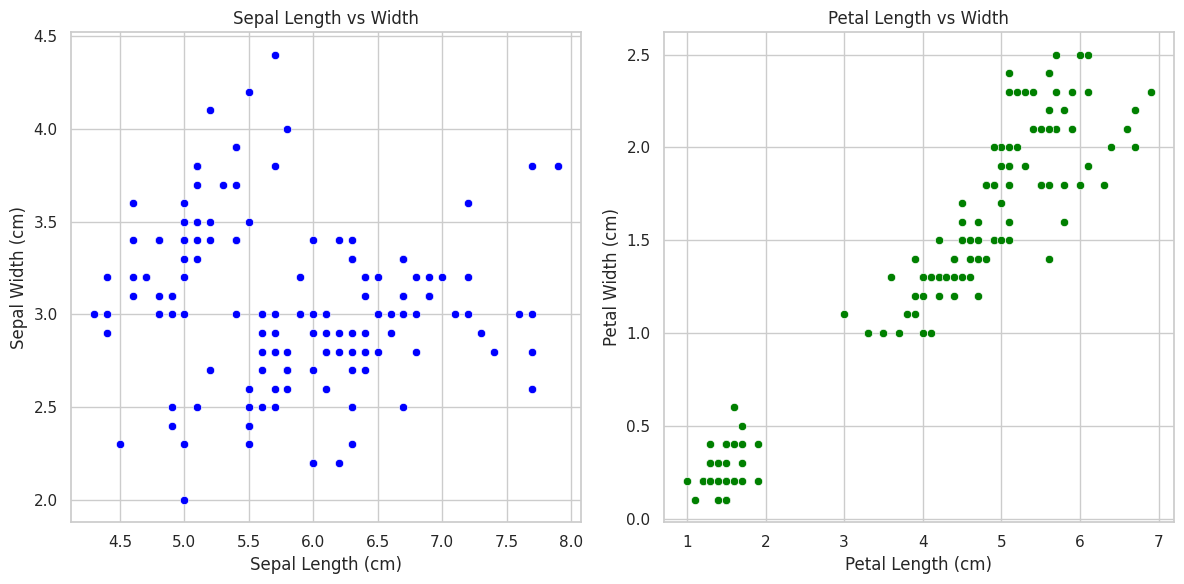

In [7]:
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

MYSQL_HOST = "mysql-ce646e0-matakuliah.i.aivencloud.com"
MYSQL_PORT = 18376
MYSQL_DB = "defaultdb"
MYSQL_USER = "avnadmin"
MYSQL_PASS = "AVNS_ttJDVCcji3xAatQ6zvd"

# Buat koneksi dengan SQLAlchemy
# Berikan parameter ssl sebagai dictionary untuk PyMySQL
db_url = f"mysql+pymysql://{MYSQL_USER}:{MYSQL_PASS}@{MYSQL_HOST}:{MYSQL_PORT}/{MYSQL_DB}"
# Tambahkan connect_args untuk parameter SSL
engine = create_engine(db_url, connect_args={'ssl': {'ssl': {}}})


# Ambil data
query = "SELECT sepalLengthCm, sepalWidthCm, petalLengthCm, petalWidthCm FROM irissql;"
df = pd.read_sql(query, engine)

# Visualisasi
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="sepalLengthCm", y="sepalWidthCm", color='blue')
plt.title("Sepal Length vs Width")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="petalLengthCm", y="petalWidthCm", color='green')
plt.title("Petal Length vs Width")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")

plt.tight_layout()
plt.show()

5. Menghitung k means dengan k dari 2 sampai 4, beserta visualisasi nya

In [8]:
val_X = np.array([row[1:] for row in data_remove_class])
k_means_C2 = KMeans(
    n_clusters=2,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=1,
    random_state=42,
    copy_x=True,
    algorithm='lloyd'
)

k_means_C2.fit(val_X)

labelC2 = k_means_C2.labels_
centroidsC2 = k_means_C2.cluster_centers_
InertiaC2 = k_means_C2.inertia_

Initialization complete
Iteration 0, inertia 135.61999999999998.
Iteration 1, inertia 105.16576351752823.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 216.54999999999995.
Iteration 1, inertia 105.28435999999999.
Iteration 2, inertia 105.16576351752823.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 159.73000000000002.
Iteration 1, inertia 106.33766372492286.
Iteration 2, inertia 105.16576351752823.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 144.86999999999998.
Iteration 1, inertia 105.28435999999999.
Iteration 2, inertia 105.16576351752823.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 199.2599999999999.
Iteration 1, inertia 107.14788485611595.
Iteration 2, inertia 105.16576351752823.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 160.12000000000003.
Iteration 1,

In [15]:
from sklearn.cluster import KMeans
import numpy as np

# Asumsikan data_remove_class sudah tersedia dan tidak mengandung kolom class
val_X = np.array([row[1:] for row in data_remove_class])

# KMeans untuk k = 3
k_means_C3 = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=1,
    random_state=42,
    copy_x=True,
    algorithm='lloyd'
)

# Latih model
k_means_C3.fit(val_X)

# Ambil hasil
labelC3 = k_means_C3.labels_
centroidsC3 = k_means_C3.cluster_centers_
InertiaC3 = k_means_C3.inertia_


Initialization complete
Iteration 0, inertia 101.62999999999994.
Iteration 1, inertia 53.71228616780049.
Iteration 2, inertia 49.637470833333346.
Iteration 3, inertia 48.36391864506109.
Iteration 4, inertia 48.168714731262334.
Iteration 5, inertia 48.03795999999999.
Iteration 6, inertia 48.01326442577033.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 74.96999999999998.
Iteration 1, inertia 48.17967067102235.
Iteration 2, inertia 48.03795999999999.
Iteration 3, inertia 48.01326442577033.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 73.51999999999998.
Iteration 1, inertia 53.75499394383634.
Iteration 2, inertia 49.01050335439959.
Iteration 3, inertia 48.4406800962021.
Iteration 4, inertia 48.20424930555555.
Iteration 5, inertia 48.170190905332795.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 58.830000000000005.
Iteration 1, inertia 48.659167658964435.
I

In [20]:
from sklearn.cluster import KMeans
import numpy as np

# Asumsikan data_remove_class sudah tersedia dan tidak mengandung kolom class
val_X = np.array([row[1:] for row in data_remove_class])

# KMeans untuk k = 4
k_means_C4 = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    max_iter=300,
    tol=0.0001,
    verbose=1,
    random_state=42,
    copy_x=True,
    algorithm='lloyd'
)

# Latih model
k_means_C4.fit(val_X)

# Ambil hasil
labelC4 = k_means_C4.labels_
centroidsC4 = k_means_C4.cluster_centers_
InertiaC4 = k_means_C4.inertia_


Initialization complete
Iteration 0, inertia 50.13.
Iteration 1, inertia 34.51888608441198.
Iteration 2, inertia 34.39441862706302.
Iteration 3, inertia 34.35062490842491.
Converged at iteration 3: strict convergence.
Initialization complete
Iteration 0, inertia 54.48999999999999.
Iteration 1, inertia 37.0637319741342.
Iteration 2, inertia 35.33608722668967.
Iteration 3, inertia 34.84717737737736.
Iteration 4, inertia 34.75469840125414.
Iteration 5, inertia 34.67641033278176.
Iteration 6, inertia 34.57568304510763.
Iteration 7, inertia 34.51289444444444.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 63.000000000000014.
Iteration 1, inertia 36.4527138269532.
Iteration 2, inertia 34.98067929577097.
Iteration 3, inertia 34.84717737737736.
Iteration 4, inertia 34.75469840125414.
Iteration 5, inertia 34.67641033278176.
Iteration 6, inertia 34.57568304510763.
Iteration 7, inertia 34.51289444444444.
Converged at iteration 7: strict convergence.
Ini

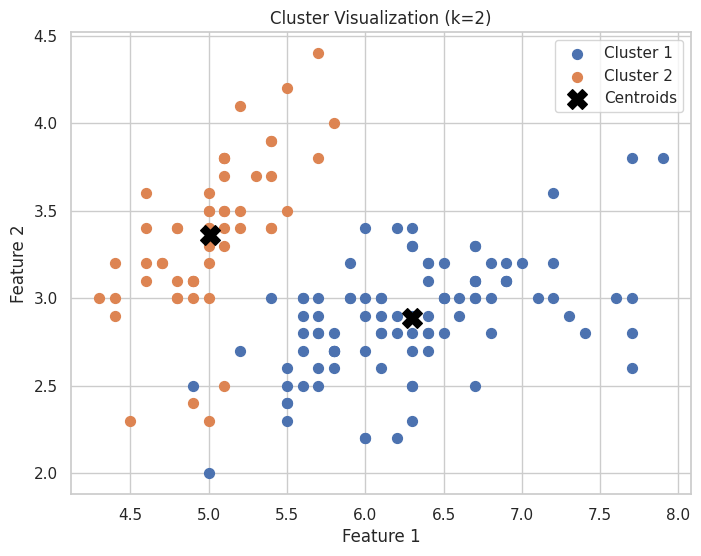

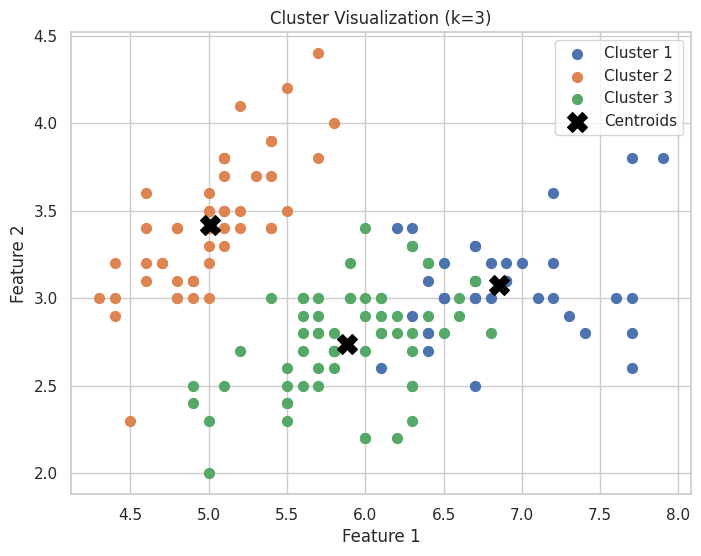

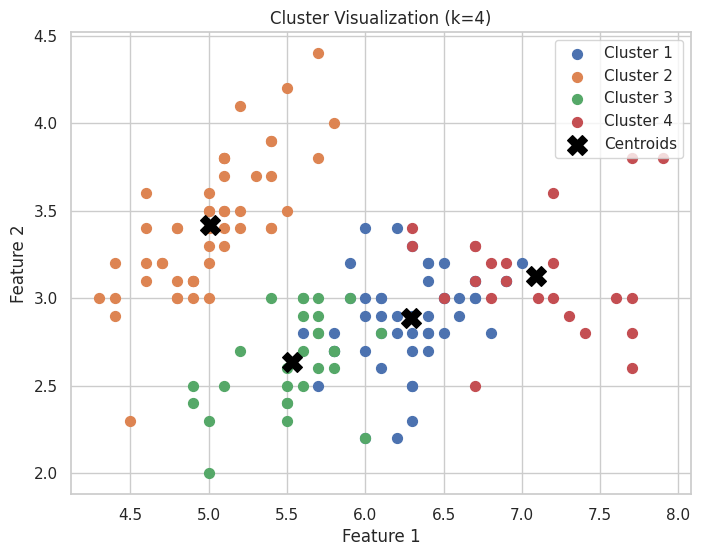

In [27]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Misal val_X adalah data yang sudah ada
k_values = [2, 3, 4]  # Uji dengan K=2, K=3, dan K=4

for k in k_values:
    k_means = KMeans(n_clusters=k, random_state=42)
    labels = k_means.fit_predict(val_X)

    plt.figure(figsize=(8, 6))

    # Visualisasi cluster
    for i in range(k):
        plt.scatter(val_X[labels == i, 0], val_X[labels == i, 1], s=50, label=f'Cluster {i+1}')

    # Visualisasi centroid
    centroids = k_means.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')

    plt.title(f'Cluster Visualization (k={k})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()


6. Hitung nilai inertia dan siluet score dari setiap k dari 2 sampai 4

In [11]:
val_X = df.values
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(val_X)
print("Inertia dengan k = 2:", kmeans.inertia_)


Inertia dengan k = 2: 152.36870647733915


In [13]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import pymysql

val_X = np.array(df)

k_means = KMeans(n_clusters=2, random_state=42)
labels = k_means.fit_predict(val_X)

sil_score = silhouette_score(val_X, labels)

print("Silhouette Score untuk k=2: ", sil_score)


Silhouette Score untuk k=2:  0.6808136202936816


In [17]:
val_X = df.values
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(val_X)
print("Inertia dengan k = 3:", kmeans.inertia_)


Inertia dengan k = 3: 78.94506582597728


In [28]:
val_X = np.array(df)

k_means = KMeans(n_clusters=3, random_state=42)
labels = k_means.fit_predict(val_X)

sil_score = silhouette_score(val_X, labels)

print("Silhouette Score untuk k = 3: ", sil_score)


Silhouette Score untuk k = 3:  0.5509643746707443


In [21]:
val_X = df.values
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(val_X)
print("Inertia dengan k = 4:", kmeans.inertia_)


Inertia dengan k = 4: 57.44028021295475


In [23]:
val_X = np.array(df)

k_means = KMeans(n_clusters=4, random_state=42)
labels = k_means.fit_predict(val_X)

sil_score = silhouette_score(val_X, labels)

print("Silhouette Score untuk k = 4: ", sil_score)


Silhouette Score untuk k = 4:  0.4974115445023624


7. Visualisasi dari score siluet

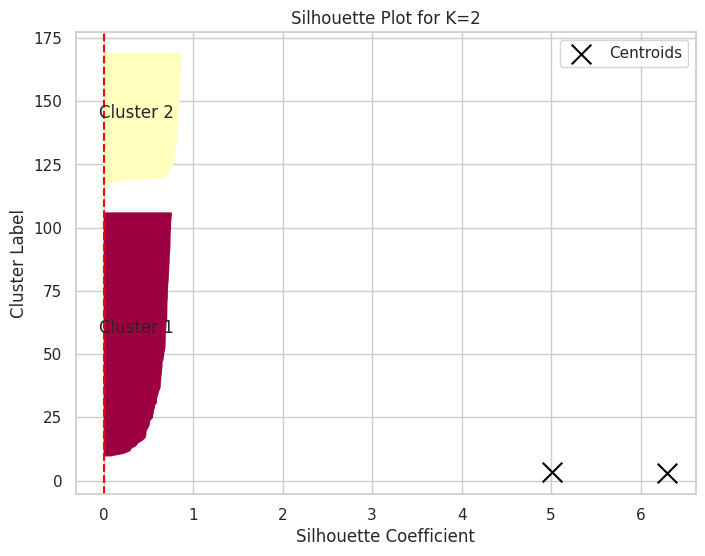

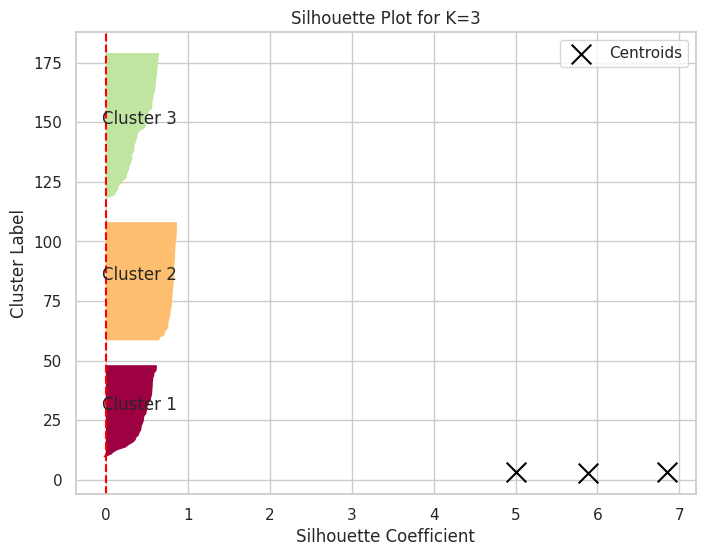

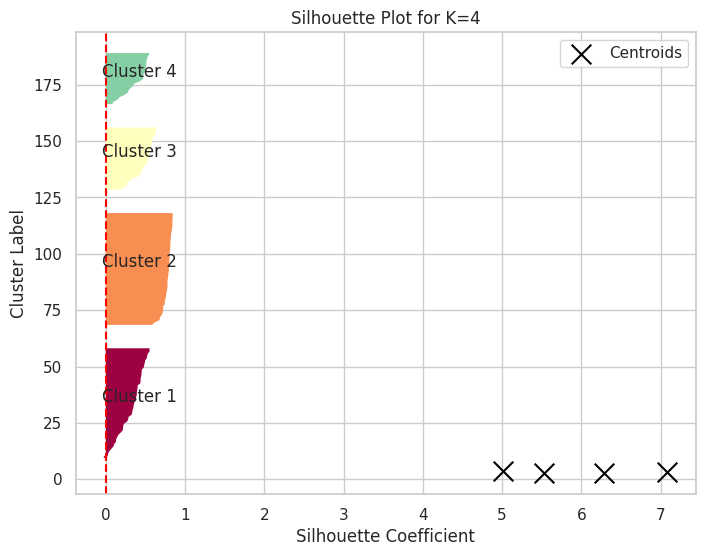

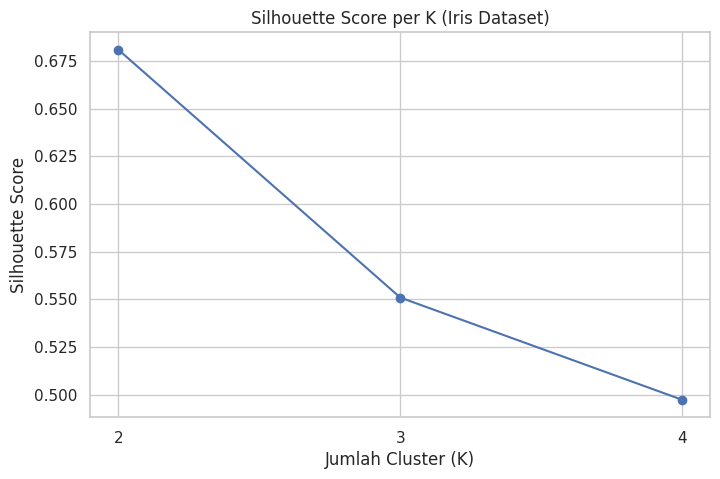


K dengan Silhouette Score terbaik adalah: K = 2


In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import numpy as np

# Asumsi data sudah ada di val_X (data yang digunakan untuk clustering)

k_range = range(2, 5)  # Uji untuk K=2, K=3, K=4
silhouette_scores = []
cluster_results = {}

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(val_X)

    # Hitung Silhouette Score
    silhouette_values = silhouette_samples(val_X, labels)
    silhouette_scores.append(silhouette_score(val_X, labels))  # Menyimpan Silhouette Score untuk K

    # Simpan hasil untuk plotting nanti
    cluster_results[k] = {
        'labels': labels,
        'silhouette_values': silhouette_values,
        'centroids': kmeans.cluster_centers_
    }

    # ---- Silhouette Plot untuk K Cluster ----
    fig, ax = plt.subplots(figsize=(8, 6))
    y_lower = 10

    for i in range(k):  # Loop untuk masing-masing cluster
        ith_cluster_silhouette_values = silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.Spectral(float(i) / k)

        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, color=color)
        ax.text(-0.05, (y_lower + y_upper) / 2, f'Cluster {i + 1}', fontsize=12)

        y_lower = y_upper + 10

    ax.set_title(f"Silhouette Plot for K={k}")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster Label")
    ax.axvline(x=0, color='red', linestyle='--')

    # Centroid visualisation (titik centroid)
    centroids = cluster_results[k]['centroids']
    ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='black', label='Centroids')

    plt.legend(loc="best")
    plt.show()

# ---- Plot Silhouette Score per K ----
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title("Silhouette Score per K (Iris Dataset)")
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.xticks(k_range)
plt.show()

# Tampilkan K optimal berdasarkan Silhouette Score tertinggi
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\nK dengan Silhouette Score terbaik adalah: K = {optimal_k}")


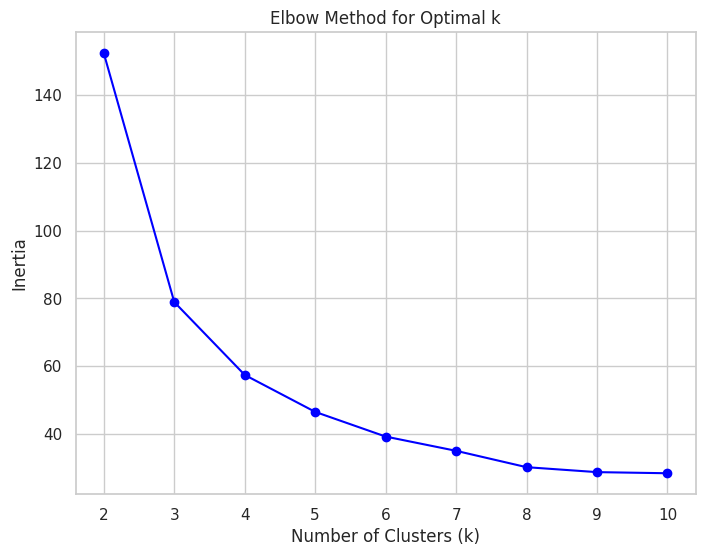

In [30]:
import matplotlib.pyplot as plt

inertia_values = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(val_X)
    inertia_values.append(kmeans.inertia_)

# Plotting inertia vs k
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), inertia_values, marker='o', color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()
